In [1]:
import pandas as pd

users = pd.read_csv('game_data/users.csv')
recoms = pd.read_csv('game_data/recommendations.csv')
games = pd.read_csv('game_data/games.csv')

In [ ]:
users.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [ ]:
recoms.head() 

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


In [ ]:
games.head() 

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [5]:
games_metadata = pd.read_json('game_data/games_metadata.json', lines=True)
games_metadata.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [6]:
games = games.drop(columns=['price_final', 'discount', 'steam_deck'])
games_metadata = games_metadata.drop(columns=['description'])

gamesF = pd.merge(games, games_metadata, on='app_id')

print(gamesF.head())

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_original  \
0  Very Positive              84          2199            9.99   
1       Positive              85            21            2.99   
2  Very Positive              92          3722           14.99   
3          Mixed              61           873           14.99   
4  Very Positive              88          8784           11.99   

                                                tags  
0  [Action, Adventure, Parkour, Third Person, Gre...  
1     

In [7]:
ratings = recoms.drop(columns=['funny', 'review_id', 'date'])
# ratings['is_recommended'] = ratings['is_recommended'].astype(int)
ratings.head()

,app_id,helpful,is_recommended,hours,user_id
0,975370,0,True,36.3,51580
1,304390,4,False,11.5,2586
2,1085660,2,True,336.5,253880
3,703080,0,True,27.4,259432
4,526870,0,True,7.9,23869


## Ratings

`is_recommended` with 1: True, 0: False

In [36]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   is_recommended  bool   
 3   hours           float64
 4   user_id         int64  
dtypes: bool(1), float64(1), int64(3)
memory usage: 1.3 GB


most people buy and play a game will feel satisfy the game they bought and recommend it 

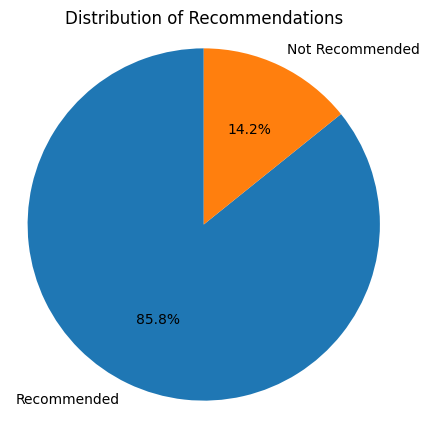

Total number of ratings: 41154794


In [31]:
import matplotlib.pyplot as plt

counts = ratings['is_recommended'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=['Recommended', 'Not Recommended'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Recommendations')
plt.axis('equal')  
plt.show()

total_ratings = counts.sum()
print(f"Total number of ratings: {total_ratings}")

In [38]:
ratings["helpful"].value_counts()

helpful
0       32461479
2        3031835
3        1426745
4         813769
5         534365
          ...   
8023           1
2403           1
3762           1
3067           1
2750           1
Name: count, Length: 3910, dtype: int64

a person can review a lot of games and a game can be reviewed by a lot of people 

In [33]:
ratings["user_id"].value_counts()

user_id
11764552    6045
5112758     4152
11656130    3840
5669734     3479
11553593    3392
            ... 
5020742        1
492792         1
9465838        1
4772449        1
106343         1
Name: count, Length: 13781059, dtype: int64

In [34]:
ratings["app_id"].value_counts()

app_id
440        319492
252490     270684
1091500    226414
730        219737
570        216914
            ...  
1479980         1
924770          1
1540360         1
1892680         1
1245260         1
Name: count, Length: 37610, dtype: int64

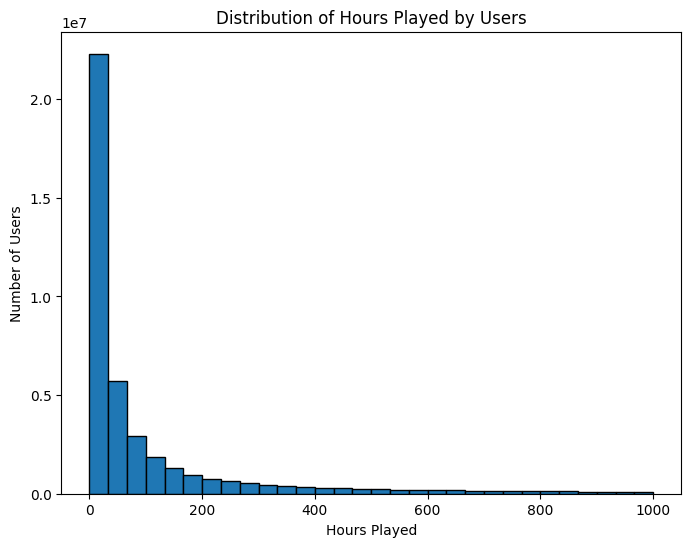

In [63]:
plt.figure(figsize=(8, 6))
plt.hist(ratings['hours'], bins=30, edgecolor='black')
plt.title('Distribution of Hours Played by Users')
plt.xlabel('Hours Played')
plt.ylabel('Number of Users')
plt.show()

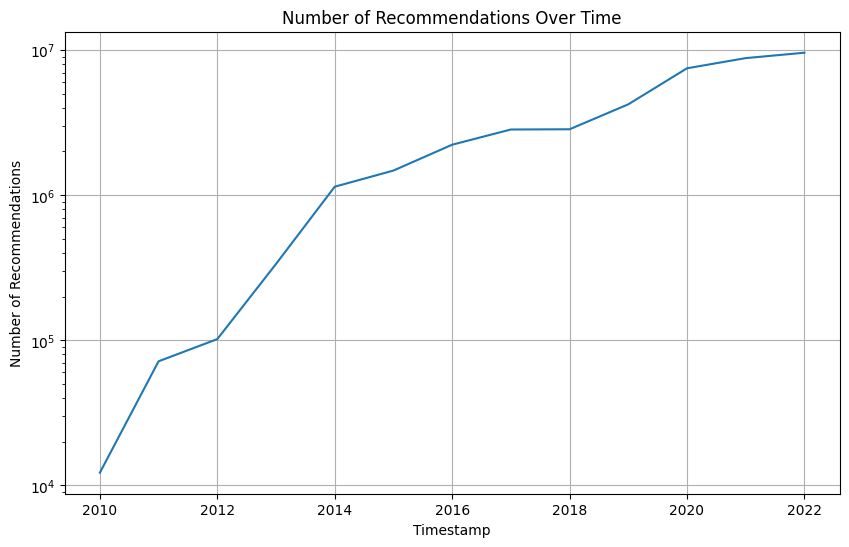

In [68]:
ratings['date'] = pd.to_datetime(ratings['date'])
ratings['publish_year'] = ratings['date'].dt.year

recommendations_by_time = ratings['publish_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(recommendations_by_time.index, recommendations_by_time.values)
plt.title('Number of Recommendations Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Recommendations')
plt.grid(True)
plt.yscale('log')
plt.show()

## Users

In [35]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 327.4 MB


people tend to buy more than 1 game to play, 7 is the most number games people tend to buy

In [8]:
users["products"].value_counts()

products
7        171676
8        170809
6        170332
9        170293
10       169469
          ...  
8709          1
11408         1
6823          1
6899          1
3673          1
Name: count, Length: 7572, dtype: int64

some people do not buy any game but still have reviews, but still play times though. This is because family privacy, member of family purchase games make the members of family can play too, still worth to keep

In [20]:
users[users["products"]==0]

,user_id,products,reviews
5885,11338443,0,1
6443,11461157,0,1
7342,11651120,0,0
8157,11829513,0,1
10484,12690993,0,1
...,...,...,...
14306029,4963670,0,0
14306041,4982429,0,0
14306060,5048153,0,0
14306062,5074363,0,0


We will remove user who not buy any product and not review any product

In [29]:
len(users[(users["products"] == 0) & (users["reviews"] == 0)])

14076

In [30]:
len(users[users["reviews"] == 0])

525005

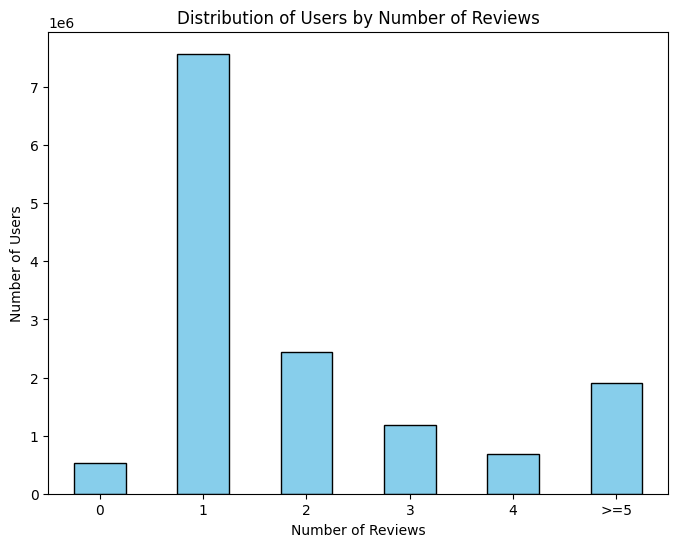

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

users['review_category'] = pd.cut(
    users['reviews'], 
    bins=[-1, 0, 1, 2, 3, 4, float('inf')], 
    labels=['0', '1', '2', '3', '4', '>=5']
)
review_counts = users['review_category'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
review_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

In [37]:
len(users[users["reviews"] == 5])

435822

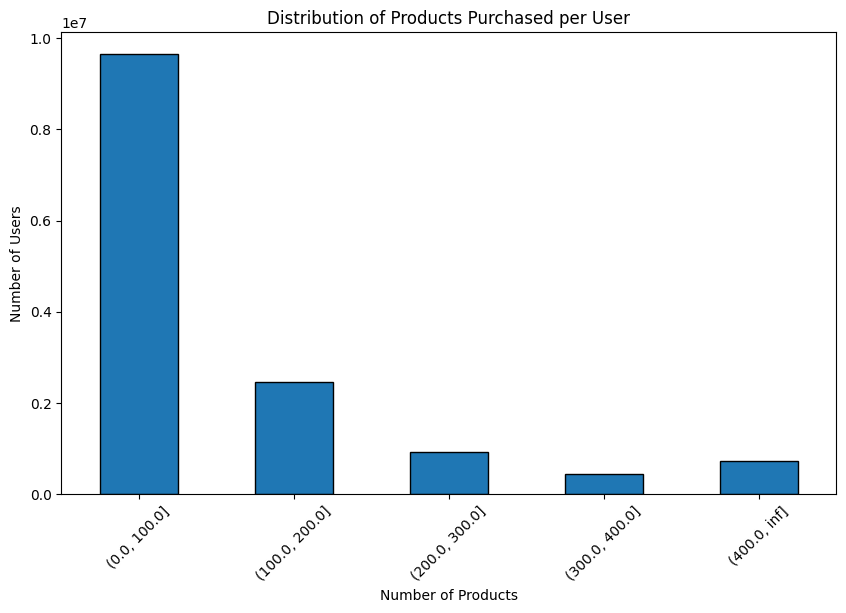

In [62]:
bins = [0 , 100 , 200 , 300 , 400 , float('inf')]
users['product_bin'] = pd.cut(users['products'], bins=bins)
bin_counts = users['product_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Products Purchased per User')
plt.xlabel('Number of Products')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

most people review small amount of games, maybe they like or dislike

quite amount of people do not review any game(top 5)

In [44]:
users["reviews"].value_counts()

reviews
1      7573027
2      2436378
3      1178593
4       682230
0       525005
        ...   
905          1
723          1
662          1
917          1
599          1
Name: count, Length: 681, dtype: int64

## Games

In [46]:
gamesF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_original  50872 non-null  float64
 10  tags            50872 non-null  object 
dtypes: bool(3), float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [47]:
gamesF["num_genres"] = gamesF["tags"].apply(lambda x: len(x))
gamesF["num_genres"].value_counts()

num_genres
20    15455
3      3376
4      3128
5      3042
2      2725
1      2356
6      2340
7      1915
8      1601
9      1479
10     1363
11     1250
0      1244
12     1239
16     1204
14     1203
15     1199
13     1196
17     1194
18     1187
19     1176
Name: count, dtype: int64

hau het cac bo game deu thuoc nhieu the loai khac nhau, tham chi co nhieu game khong duoc tags vao bat ki the loai nao

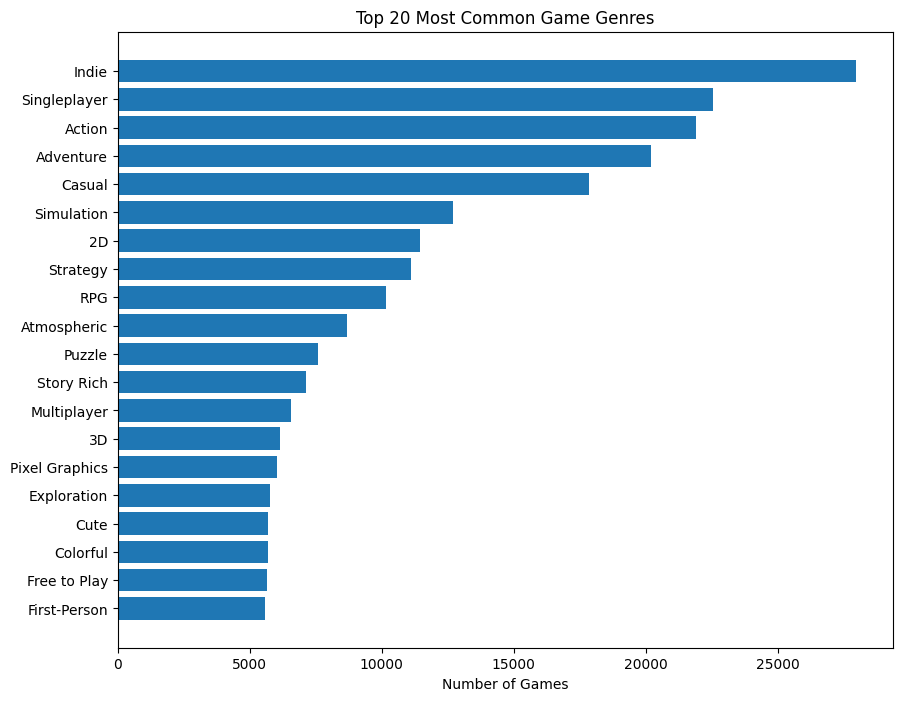

In [49]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_list in gamesF["tags"]:
    for genre in genre_list:
        genres_counter[genre] += 1

top_20_genres = dict(sorted(genres_counter.items(), key=lambda item: item[1], reverse=True)[:20])

plt.figure(figsize=(10, 8))
plt.barh(list(top_20_genres.keys()), list(top_20_genres.values()))
plt.xlabel('Number of Games')
plt.title('Top 20 Most Common Game Tags')
plt.gca().invert_yaxis()  
plt.show()

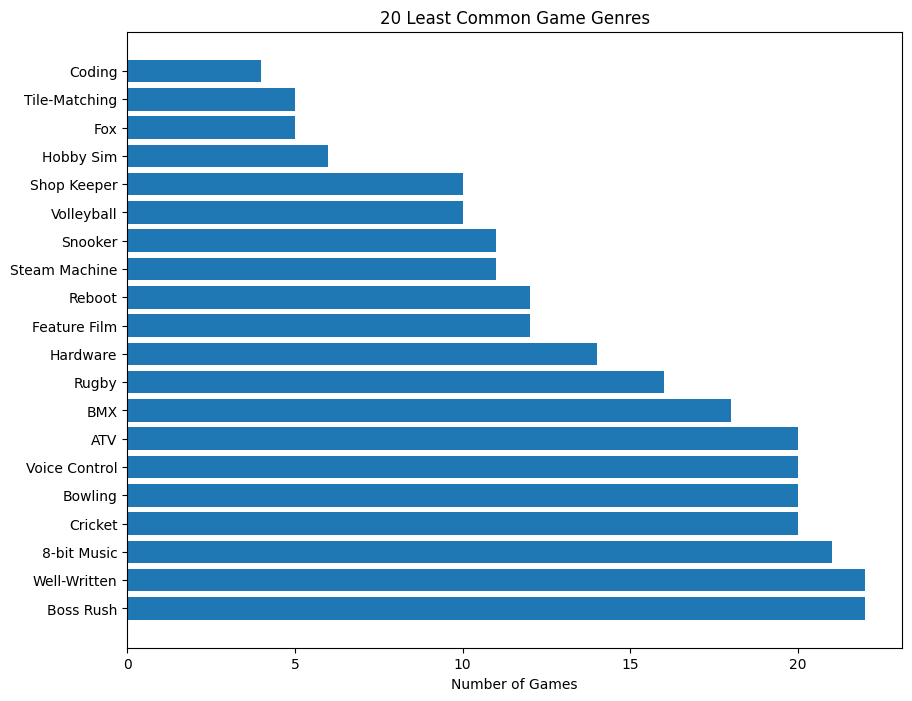

In [51]:
least_20_genres = dict(sorted(genres_counter.items(), key=lambda item: item[1])[:20])

plt.figure(figsize=(10, 8))
plt.barh(list(least_20_genres.keys()), list(least_20_genres.values()))
plt.xlabel('Number of Games')
plt.title('20 Least Common Game Genres')
plt.gca().invert_yaxis() 
plt.show()

how many games release on each year

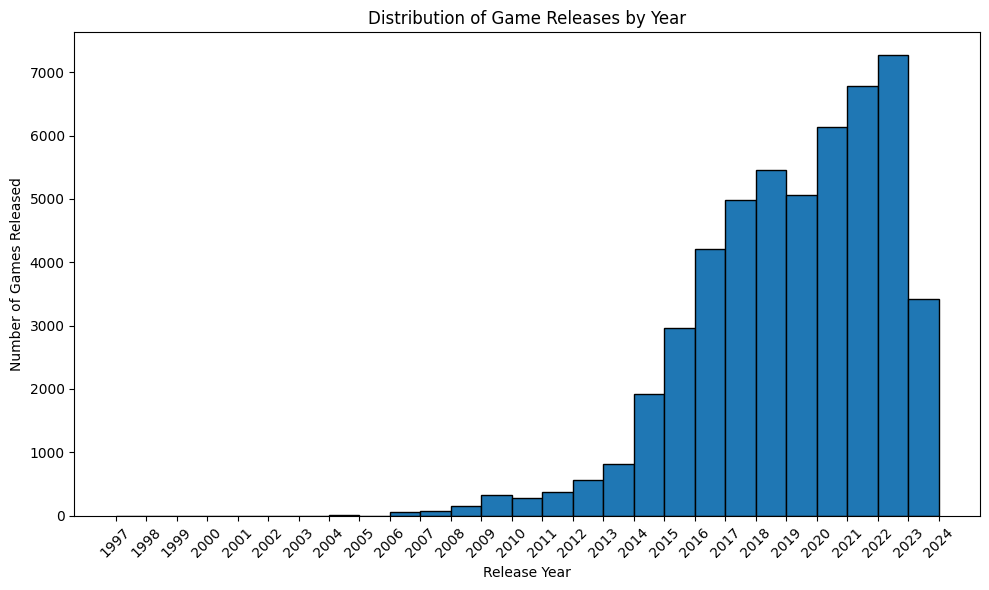

In [56]:
gamesF['date_release'] = pd.to_datetime(gamesF['date_release'])

gamesF['release_year'] = gamesF['date_release'].dt.year

plt.figure(figsize=(10, 6))
plt.hist(gamesF['release_year'], bins=range(min(gamesF['release_year']), max(gamesF['release_year']) + 2), edgecolor='black')
plt.title('Distribution of Game Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')
plt.xticks(range(min(gamesF['release_year']), max(gamesF['release_year']) + 2))
plt.xticks(rotation=45)
plt.tight_layout()

How many percentage games support Windows , Linux , MacOS

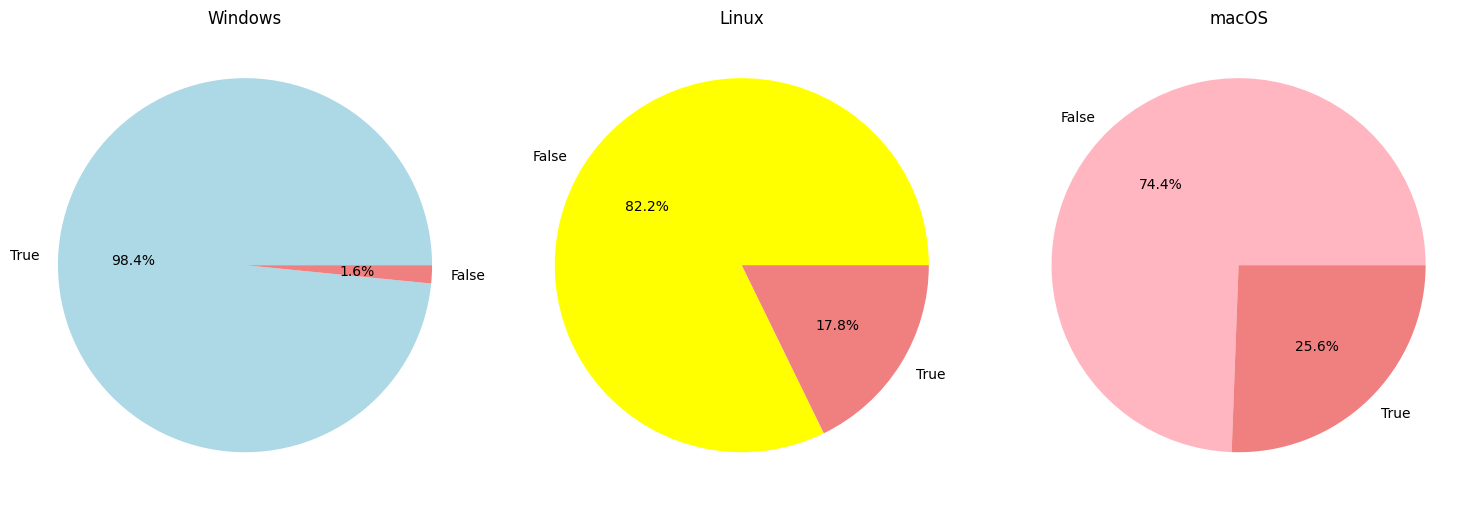

In [59]:
counts_win = gamesF['win'].value_counts()
counts_linux = gamesF['linux'].value_counts()
counts_mac = gamesF['mac'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(counts_win, labels=counts_win.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axs[0].set_title('Windows')

axs[1].pie(counts_linux, labels=counts_linux.index, autopct='%1.1f%%', colors=['yellow', 'lightcoral'])
axs[1].set_title('Linux')

axs[2].pie(counts_mac, labels=counts_mac.index, autopct='%1.1f%%', colors=['lightpink', 'lightcoral'])
axs[2].set_title('macOS')
plt.tight_layout()

Count of Overall Rated Games by everyone

C:\Users\minhm\AppData\Local\Temp\ipykernel_39636\290891063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x='rating' , data = games ,


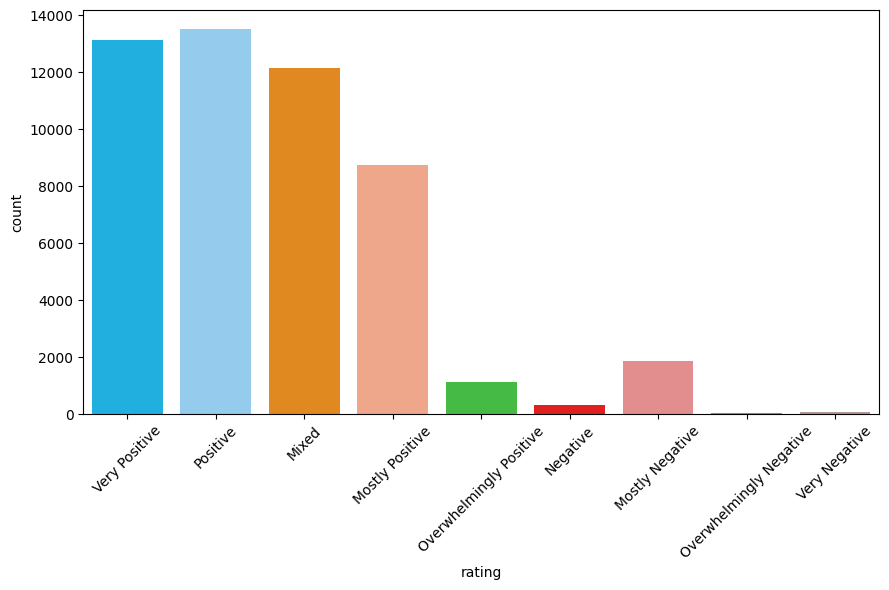

In [60]:
import seaborn as sns
plt.figure(figsize=(9, 6))
sns.countplot( x='rating' , data = games , 
    palette = [
    'DeepSkyBlue',        # Very Positive
    'LightSkyBlue',       # Positive
    'DarkOrange',         # Mixed
    'LightSalmon',        # Mostly Positive
    'LimeGreen',          # Overwhelmingly Positive
    'Red',                # Negative
    'LightCoral',         # Mostly Negative
    'MediumPurple',       # Overwhelmingly Negative
    'RosyBrown'           # Very Negative
])
plt.xticks(rotation=45)
plt.tight_layout()

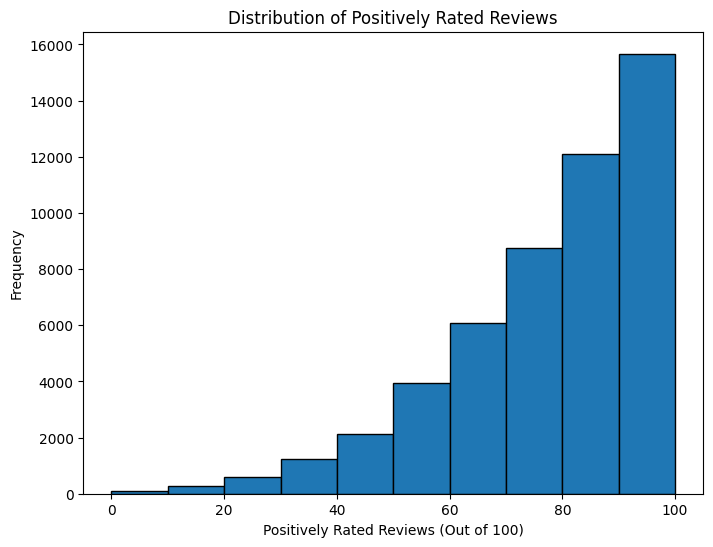

In [61]:
plt.figure(figsize=(8, 6))
plt.hist(gamesF['positive_ratio'], bins=10, edgecolor='black')
plt.title('Distribution of Positively Rated Reviews')
plt.xlabel('Positively Rated Reviews (Out of 100)')
plt.ylabel('Frequency')
plt.show()